In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.tree import export_graphviz
import graphviz

# Classification

In [2]:
wine_data = datasets.load_wine()

In [3]:
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## Look at a few rows

In [4]:
feature1_index = 6
feature2_index = 0

In [5]:
random_index = np.random.randint(low=0, high=len(wine_data.target), size=10)

In [6]:
pd.DataFrame({
    wine_data.feature_names[feature1_index]: wine_data.data[random_index, feature1_index].tolist() + [2.4],
    wine_data.feature_names[feature2_index]: wine_data.data[random_index, feature2_index].tolist() + [13.2],
    "Type de vin": wine_data.target[random_index].tolist() + ['??']
             })[-10:][[wine_data.feature_names[feature1_index], 
                      wine_data.feature_names[feature2_index],
                     "Type de vin"]]

,flavanoids,alcohol,Type de vin
1,2.26,11.62,1
2,1.75,12.17,1
3,2.92,11.61,1
4,2.03,11.76,1
5,1.79,13.67,1
6,2.65,13.05,1
7,3.40,13.83,0
8,1.10,13.48,2
9,2.52,14.39,0
10,2.40,13.20,??


In [7]:
pd.DataFrame({
    wine_data.feature_names[feature1_index]: wine_data.data[random_index, feature1_index].tolist() + [3.5],
    wine_data.feature_names[feature2_index]: wine_data.data[random_index, feature2_index].tolist() + [12.1],
    "Type de vin": wine_data.target[random_index].tolist() + ['??']
             })[-10:][[wine_data.feature_names[feature1_index], 
                      wine_data.feature_names[feature2_index],
                     "Type de vin"]]

,flavanoids,alcohol,Type de vin
1,2.26,11.62,1
2,1.75,12.17,1
3,2.92,11.61,1
4,2.03,11.76,1
5,1.79,13.67,1
6,2.65,13.05,1
7,3.40,13.83,0
8,1.10,13.48,2
9,2.52,14.39,0
10,3.50,12.10,??


In [27]:
feature1_index = 6
feature2_index = 0

trace0 = go.Scatter(
    x = wine_data.data[wine_data.target == 0, feature1_index],
    y = wine_data.data[wine_data.target == 0, feature2_index],
    name = 'Type 0',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(12, 0, 152, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = wine_data.data[wine_data.target == 1, feature1_index],
    y = wine_data.data[wine_data.target == 1, feature2_index],
    name = 'Type 1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(0, 152, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace2 = go.Scatter(
    x = wine_data.data[wine_data.target == 2, feature1_index],
    y = wine_data.data[wine_data.target == 2, feature2_index],
    name = 'Type 2',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace_unknowns = go.Scatter(
    x = [1.8, 0.7, 3.1],
    y = [13.2, 12.0, 12.7],
    name = "Inconnus",
    mode = "markers",
    marker = dict(
        size = 10,
        color = 'rgba(0, 0, 0, 0.15)',
        line = dict(width = 2,)
    )
)


layout = dict(title = 'Vins',
              xaxis = dict(title = wine_data.feature_names[feature1_index]),
              yaxis = dict(title = wine_data.feature_names[feature2_index])
             )

data = [trace0, trace1, trace2, trace_unknowns]


iplot({"data": data, "layout": layout}, filename=None)

In [9]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(wine_data.data[:, [feature1_index, feature2_index]], wine_data.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

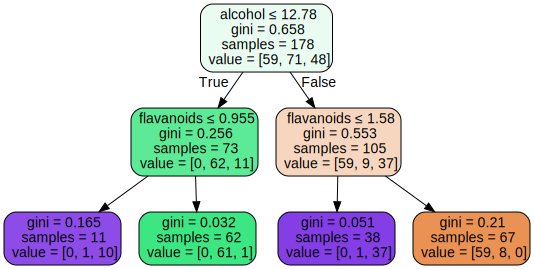

In [10]:
dot_data_tree = export_graphviz(tree, out_file=None, 
                         feature_names=[wine_data.feature_names[feature1_index],wine_data.feature_names[feature2_index]],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graphviz.Source(dot_data_tree)

In [28]:
feature1_index = 6
feature2_index = 0

x_min, x_max = wine_data.data[:, feature1_index].min() - 1, wine_data.data[:, feature1_index].max() + 1
y_min, y_max = wine_data.data[:, feature2_index].min() - 1, wine_data.data[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
y_ = np.arange(y_min, y_max, 0.1)
z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

trace0 = go.Scatter(
    x = wine_data.data[wine_data.target == 0, feature1_index],
    y = wine_data.data[wine_data.target == 0, feature2_index],
    name = 'Type 0',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(0, 0, 152, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = wine_data.data[wine_data.target == 1, feature1_index],
    y = wine_data.data[wine_data.target == 1, feature2_index],
    name = 'Type 1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(0, 152, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace2 = go.Scatter(
    x = wine_data.data[wine_data.target == 2, feature1_index],
    y = wine_data.data[wine_data.target == 2, feature2_index],
    name = 'Type 2',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

contour = go.Contour(
    x=xx[0], y=y_, 
    z=z,
    colorscale=[[0, 'blue'],
                [1, 'yellow'],
                [2, 'red']
               ],
    opacity=0.5,
    showscale=False
)

trace_unknowns = go.Scatter(
    x = [3.5, 2.4],
    y = [12.1, 13.2],
    name = "Inconnus",
    mode = "markers",
    marker = dict(
        size = 10,
        color = 'rgba(0, 0, 0, 0.15)',
        line = dict(width = 2,)
    )
)

data = [trace0, trace1, trace2, contour, trace_unknowns]


layout = dict(title = 'Vins',
              xaxis = dict(title = wine_data.feature_names[feature1_index]),
              yaxis = dict(title = wine_data.feature_names[feature2_index])
             )

iplot({"data": data, "layout": layout}, filename=None)

In [12]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(wine_data.data[:, [feature1_index, feature2_index]], wine_data.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [29]:
x_min, x_max = wine_data.data[:, feature1_index].min() - 1, wine_data.data[:, feature1_index].max() + 1
y_min, y_max = wine_data.data[:, feature2_index].min() - 1, wine_data.data[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
y_ = np.arange(y_min, y_max, 0.1)
z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

feature1_index = 6
feature2_index = 0

trace0 = go.Scatter(
    x = wine_data.data[wine_data.target == 0, feature1_index],
    y = wine_data.data[wine_data.target == 0, feature2_index],
    name = 'Type 0',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(0, 0, 152, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = wine_data.data[wine_data.target == 1, feature1_index],
    y = wine_data.data[wine_data.target == 1, feature2_index],
    name = 'Type 1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(0, 152, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace2 = go.Scatter(
    x = wine_data.data[wine_data.target == 2, feature1_index],
    y = wine_data.data[wine_data.target == 2, feature2_index],
    name = 'Type 2',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

contour = go.Contour(
    x=xx[0], y=y_, 
    z=z,
    colorscale=[[0, 'blue'],
                [1, 'yellow'],
                [2, 'red']
               ],
    opacity=0.5,
    showscale=False
)

trace_unknowns = go.Scatter(
    x = [3.5, 2.4],
    y = [12.1, 13.2],
    name = "Inconnus",
    mode = "markers",
    marker = dict(
        size = 10,
        color = 'rgba(0, 0, 0, 0.15)',
        line = dict(width = 2,)
    )
)

data = [trace0, trace1, trace2, contour, trace_unknowns]


layout = dict(title = 'Vins',
              xaxis = dict(title = wine_data.feature_names[feature1_index]),
              yaxis = dict(title = wine_data.feature_names[feature2_index])
             )

iplot({"data": data, "layout": layout}, filename=None)

# Regression

In [15]:
boston_data = datasets.load_boston()

In [16]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [111]:
feature1_index = 4

trace00 = go.Scatter(
    x = boston_data.data[:, feature1_index],
    y = boston_data.target,
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'blue'
        )
    )
)

data0 = [trace00]


layout = dict(title = 'Boston house price',
              xaxis = dict(title = boston_data.feature_names[feature1_index]),
              yaxis = dict(title = "House price")
             )

iplot({"data": data0, "layout": layout})

In [105]:
lr = LinearRegression()
lr.fit(boston_data.data[:, [feature1_index]], boston_data.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:

trace0 = go.Scatter(
    x = boston_data.data[:, feature1_index],
    y = boston_data.target,
    mode = 'markers',
    name = 'acutal price',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'blue'
        )
    )
)

trace1 = go.Scatter(
    x = boston_data.data[:, feature1_index],
    y = lr.predict(boston_data.data[:, [feature1_index]]),
    mode = 'line',
    name = 'predicted price',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'red'
        )
    )
)    

data = [trace0, trace1]


layout = dict(title = 'Boston house price',
              xaxis = dict(title = boston_data.feature_names[feature1_index]),
              yaxis = dict(title = "House price")
             )

iplot({"data": data, "layout": layout}, )

In [107]:
rtree = DecisionTreeRegressor(max_depth=2)
rtree.fit(boston_data.data[:, [feature1_index]], boston_data.target)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

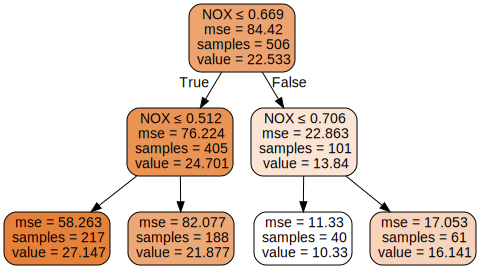

In [108]:
dot_data_tree = export_graphviz(rtree, out_file=None, 
                         feature_names=[boston_data.feature_names[feature1_index]],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graphviz.Source(dot_data_tree)

In [109]:
trace0 = go.Scatter(
    x = boston_data.data[:, feature1_index],
    y = boston_data.target,
    mode = 'markers',
    name = 'acutal price',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'blue'
        )
    )
)

trace1 = go.Scatter(
    x = sorted(boston_data.data[:, feature1_index]),
    y = rtree.predict(sorted(boston_data.data[:, [feature1_index]])),
    mode = 'line',
    name = 'predicted price',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'red'
        )
    )
)    


data = [trace0, trace1]


layout = dict(title = 'Boston house price',
              xaxis = dict(title = boston_data.feature_names[feature1_index]),
              yaxis = dict(title = "House price")
             )

iplot({"data": data, "layout": layout})

# Validation du modèle

In [51]:
tree = DecisionTreeClassifier(max_depth=12)
tree.fit(wine_data.data[:, [feature1_index, feature2_index]], wine_data.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
feature1_index = 6
feature2_index = 0

x_min, x_max = wine_data.data[:, feature1_index].min() - 1, wine_data.data[:, feature1_index].max() + 1
y_min, y_max = wine_data.data[:, feature2_index].min() - 1, wine_data.data[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
y_ = np.arange(y_min, y_max, 0.1)
z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

trace0 = go.Scatter(
    x = wine_data.data[wine_data.target == 0, feature1_index],
    y = wine_data.data[wine_data.target == 0, feature2_index],
    name = 'Type 0',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(0, 0, 152, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = wine_data.data[wine_data.target == 1, feature1_index],
    y = wine_data.data[wine_data.target == 1, feature2_index],
    name = 'Type 1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(0, 152, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace2 = go.Scatter(
    x = wine_data.data[wine_data.target == 2, feature1_index],
    y = wine_data.data[wine_data.target == 2, feature2_index],
    name = 'Type 2',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

contour = go.Contour(
    x=xx[0], y=y_, 
    z=z,
    colorscale=[[0, 'blue'],
                [1, 'green'],
                [2, 'red']
               ],
    opacity=0.5,
    showscale=False
)

trace_unknowns = go.Scatter(
    x = [3.5, 2.4],
    y = [12.1, 13.2],
    name = "Inconnus",
    mode = "markers",
    marker = dict(
        size = 10,
        color = 'rgba(0, 0, 0, 0.15)',
        line = dict(width = 2,)
    )
)

data = [trace0, trace1, trace2, contour, trace_unknowns]


layout = dict(title = 'Vins',
              xaxis = dict(title = wine_data.feature_names[feature1_index]),
              yaxis = dict(title = wine_data.feature_names[feature2_index])
             )

py.iplot({"data": data, "layout": layout}, filename=None)

In [55]:
dot_data_tree = export_graphviz(tree, out_file="complex_model.dot", 
                         feature_names=[wine_data.feature_names[feature1_index],wine_data.feature_names[feature2_index]],  
                         filled=True, rounded=True,  
                         special_characters=True) 


In [56]:
x_train, x_validation, y_train, y_validation = train_test_split(wine_data.data[:, [feature1_index, feature2_index]], 
                                                    wine_data.target, test_size=0.2)

In [57]:
print(x_train.shape, x_validation.shape)

(142, 2) (36, 2)


In [59]:
def get_score_validation(max_depth):
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(x_train, y_train)
    return tree.score(x_validation, y_validation)

In [60]:
scores_validation = list(map(get_score_validation, range(1, 15)))

In [62]:
def get_score_training(max_depth):
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(x_train, y_train)
    return tree.score(x_train, y_train)

In [63]:
scores_training = list(map(get_score_training, range(1, 15)))

In [66]:
feature1_index = 2

trace0 = go.Scatter(
    x = list(range(1, 15)),
    y = scores_training,
    mode = 'line',
    name = 'scores d\'entrainement',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'red'
        )
    )
)

trace1 = go.Scatter(
    x = list(range(1, 15)),
    y = scores_validation,
    mode = 'line',
    name = 'scores de validation',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'blue'
        )
    )
)

data = [trace0, trace1]


layout = dict(title = 'Scores sur les ensembles d\'entrainement et de validation',
              xaxis = dict(title = 'Profondeur maximale'),
              yaxis = dict(title = "Score")
             )

py.iplot({"data": data, "layout": layout}, filename=None)

In [67]:
optimal_tree = DecisionTreeClassifier(max_depth=4)
optimal_tree.fit(wine_data.data[:, [feature1_index, feature2_index]], wine_data.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

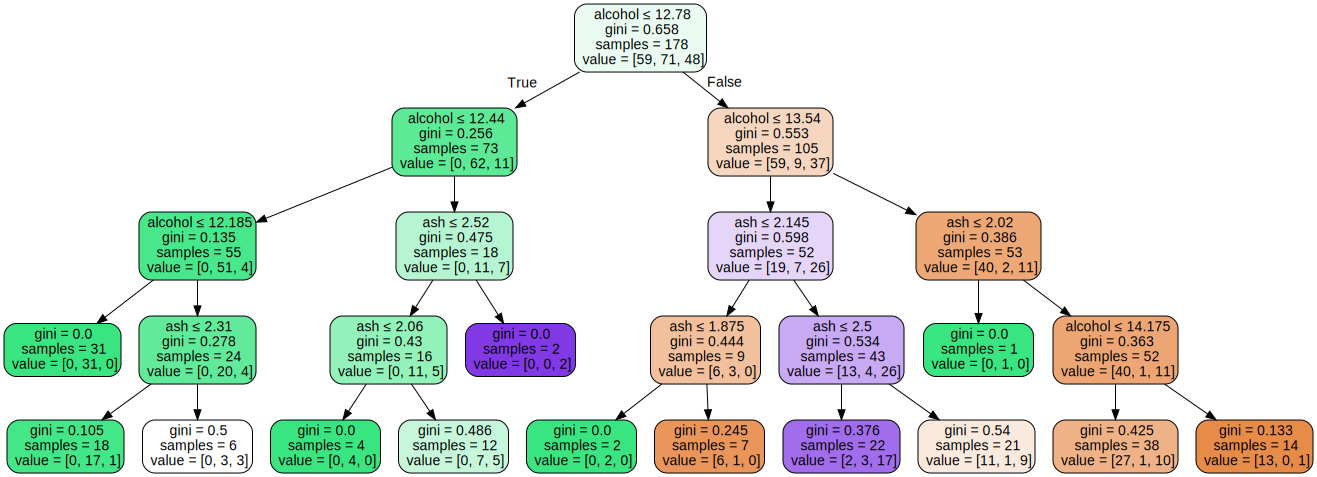

In [68]:
dot_data_tree = export_graphviz(optimal_tree, out_file=None, 
                         feature_names=[wine_data.feature_names[feature1_index],wine_data.feature_names[feature2_index]],  
                         filled=True, rounded=True,  
                         special_characters=True) 

graphviz.Source(dot_data_tree)

In [70]:
feature1_index = 6
feature2_index = 0

x_min, x_max = wine_data.data[:, feature1_index].min() - 1, wine_data.data[:, feature1_index].max() + 1
y_min, y_max = wine_data.data[:, feature2_index].min() - 1, wine_data.data[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
y_ = np.arange(y_min, y_max, 0.1)
z = optimal_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

trace0 = go.Scatter(
    x = wine_data.data[wine_data.target == 0, feature1_index],
    y = wine_data.data[wine_data.target == 0, feature2_index],
    name = 'Type 0',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(0, 0, 152, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = wine_data.data[wine_data.target == 1, feature1_index],
    y = wine_data.data[wine_data.target == 1, feature2_index],
    name = 'Type 1',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(0, 152, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace2 = go.Scatter(
    x = wine_data.data[wine_data.target == 2, feature1_index],
    y = wine_data.data[wine_data.target == 2, feature2_index],
    name = 'Type 2',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

contour = go.Contour(
    x=xx[0], y=y_, 
    z=z,
    colorscale=[[0, 'blue'],
                [1, 'green'],
                [2, 'red']
               ],
    opacity=0.5,
    showscale=False
)

trace_unknowns = go.Scatter(
    x = [3.5, 2.4],
    y = [12.1, 13.2],
    name = "Inconnus",
    mode = "markers",
    marker = dict(
        size = 10,
        color = 'rgba(0, 0, 0, 0.15)',
        line = dict(width = 2,)
    )
)

data = [trace0, trace1, trace2, contour, trace_unknowns]


layout = dict(title = 'Vins',
              xaxis = dict(title = wine_data.feature_names[feature1_index]),
              yaxis = dict(title = wine_data.feature_names[feature2_index])
             )

py.iplot({"data": data, "layout": layout}, filename=None)